In [1]:
using Flux, LinearAlgebra, CairoMakie
include("Architypes.jl")
include("FastNTKMethods.jl")

kernel

In [2]:
Nx=500
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) + cos.(xVec) + 0.2*randn(size(xVec)); 


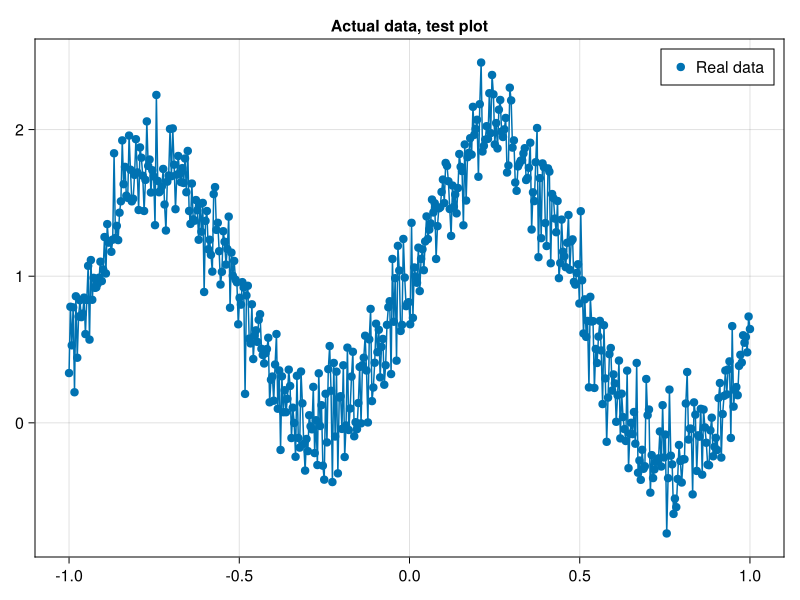

In [3]:
fig = Figure()
ax1 = Axis(fig[1,1],title="Actual data, test plot")

CairoMakie.lines!(xVec[:], yVec[:])
CairoMakie.scatter!(xVec[:], yVec[:], label="Real data")

axislegend(ax1,position=:rt)
fig

<h1>All models</h1>

In [4]:
# model_architype(architype, dimIN, dimOUT, depth, activation, critical_width=Nothing)

DEPTH = 5+2
CRI_W = 1
ACT   = relu

LH1 = model_architype("LH1",1,1,DEPTH, ACT, CRI_W)
block = model_architype("block",1,1,DEPTH, ACT, CRI_W)
funnel = model_architype("funnel",1,1,DEPTH, ACT, CRI_W)
r_funnel = model_architype("reverse_funnel",1,1,DEPTH, ACT, CRI_W)
hourglass = model_architype("hourglass",1,1,DEPTH, ACT, CRI_W)
diamond = model_architype("diamond",1,1,DEPTH, ACT, CRI_W)

E = []
diff_mode = 1

push!(E, eigen(kernel(LH1, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(block, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(funnel, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(r_funnel, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(hourglass, hcat(xVec...),true,diff_mode)))
push!(E, eigen(kernel(diamond, hcat(xVec...),true,diff_mode)))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09



ReverseDiff Jacobian: 0.882336 seconds (774.36 k allocations: 52.297 MiB, 5.94% gc time, 99.26% compilation time: 8% of which was recompilation)
Kernel computation: 0.099083 seconds (53.31 k allocations: 5.878 MiB, 91.49% compilation time)

ReverseDiff Jacobian: 0.104142 seconds (38.95 k allocations: 2.557 MiB, 97.64% compilation time)
Kernel computation: 0.000699 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.002985 seconds (8.00 k allocations: 406.250 KiB)
Kernel computation: 0.000918 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.002521 seconds (8.00 k allocations: 406.250 KiB)
Kernel computation: 0.000646 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.002332 seconds (8.00 k allocations: 406.250 KiB)
Kernel computation: 0.000899 seconds (3 allocations: 1.907 MiB)

ReverseDiff Jacobian: 0.002421 seconds (8.00 k allocations: 406.250 KiB)
Kernel computation: 0.000679 seconds (3 allocations: 1.907 MiB)


6-element Vector{Any}:
 Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}([-3.165832905046742e-14, -1.687538997430238e-14, -1.2434497875801753e-14, -9.547918011776346e-15, -5.551115123125783e-15, -4.83839574029531e-15, -4.440892098500626e-15, -3.552713678800501e-15, -3.0849065398810967e-15, -3.0290923801828103e-15  …  5.995204332975845e-15, 6.217248937900877e-15, 6.661338147750939e-15, 6.661338147750939e-15, 6.991247608979285e-15, 9.029121160646567e-15, 9.769962616701378e-15, 1.1102230246251565e-14, 75.1744909137611, 370.685916850979], [-0.001998744882914446 -0.0005396130263244488 … -0.07687050174373397 0.04546398427170911; 0.026707357712430435 0.01508811764848273 … -0.07671864195905988 0.045193912078027004; … ; 0.8006244739165812 0.14860870464603496 … -0.0012443289760326547 -0.08903196818198622; -0.37618667300672065 0.0 … -0.001092469191358692 -0.08930204037566866])
 Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … 

In [5]:
function nθ(m)
    p = length(Flux.params(m))
    lastbias = length(Flux.params(m)[p])
    all_params,_ = Flux.destructure(m)

    return length(all_params) - lastbias
end

nθ (generic function with 1 method)

500-element Vector{Float64}:
   3.165832905046742e-14
   1.687538997430238e-14
   1.2434497875801753e-14
   9.547918011776346e-15
   5.551115123125783e-15
   4.83839574029531e-15
   4.440892098500626e-15
   3.552713678800501e-15
   3.0849065398810967e-15
   3.0290923801828103e-15
   ⋮
   6.217248937900877e-15
   6.661338147750939e-15
   6.661338147750939e-15
   6.991247608979285e-15
   9.029121160646567e-15
   9.769962616701378e-15
   1.1102230246251565e-14
  75.1744909137611
 370.685916850979

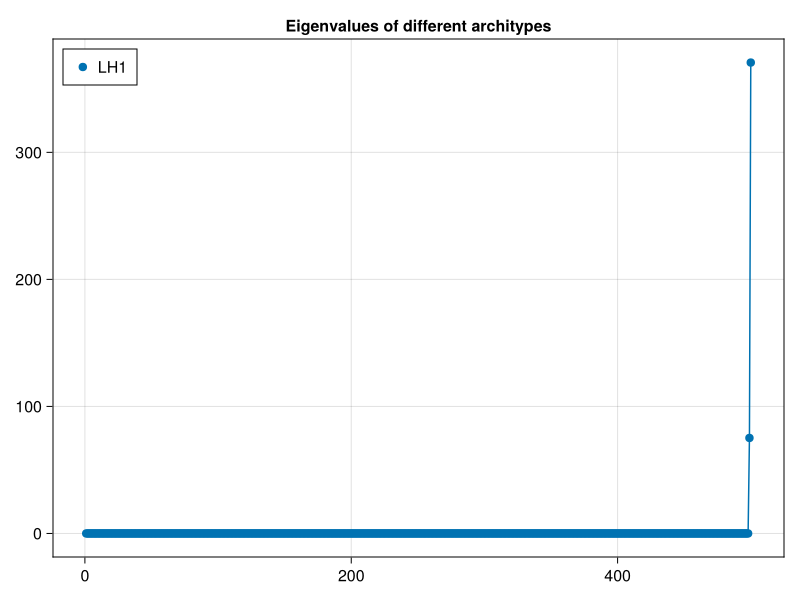

In [9]:
fig = Figure()
ax = Axis(fig[1, 1], title="Eigenvalues of different architypes", yscale=log10)

CairoMakie.scatter!(ax, abs.(E[1].values), label="LH1")
CairoMakie.lines!(ax, abs.(E[1].values))

#CairoMakie.scatter!(ax, abs.(E[2].values)/nθ(block), label="block")
#CairoMakie.lines!(ax, abs.(E[2].values)/nθ(block))

# CairoMakie.scatter!(ax, abs.(E[5].values), label="hourglass")
# CairoMakie.lines!(ax, abs.(E[5].values))

# CairoMakie.scatter!(ax, abs.(E[6].values), label="diamond")
# CairoMakie.lines!(ax, abs.(E[6].values))
display(abs.(E[1].values))

axislegend(ax, position=:lt)
fig